<a href="https://colab.research.google.com/github/slapazromero/Ejercicio_preprocesamiento/blob/main/Ejercicios_preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import scipy.stats as st
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

### 1. Crea un dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) con 1000 registros para tres datos con valores aleatorios generados (https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
- x → entre 20 y 50
- y → entre 50 y 150
- z → entre 10000 y 40000

In [2]:
data = {
    'x': [random.triangular(20, 50) for _ in range(1000)],
    'y': [random.triangular(50, 150) for _ in range(1000)],
    'z': [random.triangular(10000, 40000) for _ in range(1000)]
     }
data_frame = pd.DataFrame(data = data)

In [3]:
data_frame

,x,y,z
0,31.469366,123.781014,18568.837536
1,33.258109,117.775638,26403.123289
2,33.631154,98.142042,14428.822609
3,29.408192,89.222863,21324.094609
4,30.526462,58.656487,30009.012332
...,...,...,...
995,41.694652,112.731156,18499.042119
996,32.472578,64.262792,22183.128313
997,36.116495,109.107159,33096.629600
998,22.590672,126.069188,34255.593281


(array([ 17.,  68.,  95., 151., 190., 160., 135., 103.,  56.,  25.]),
 array([20.16968433, 23.141706  , 26.11372767, 29.08574933, 32.057771  ,
        35.02979267, 38.00181434, 40.97383601, 43.94585768, 46.91787935,
        49.88990102]),
 <a list of 10 Patch objects>)

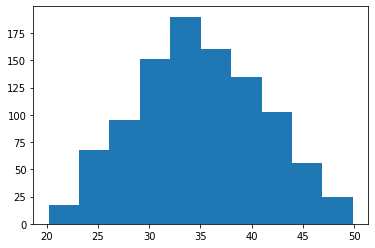

In [30]:
plt.hist(data_frame['x'])

(array([ 36.,  68.,  89., 127., 177., 186., 129., 100.,  62.,  26.]),
 array([ 52.72332647,  62.22782002,  71.73231357,  81.23680712,
         90.74130067, 100.24579422, 109.75028777, 119.25478132,
        128.75927487, 138.26376842, 147.76826197]),
 <a list of 10 Patch objects>)

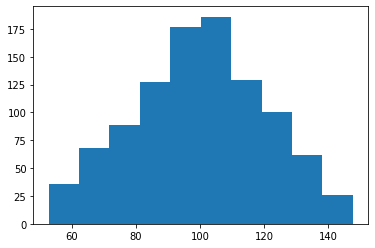

In [31]:
plt.hist(data_frame['y'])

(array([ 35.,  56.,  96., 133., 201., 153., 144.,  88.,  73.,  21.]),
 array([10886.93264192, 13754.73078663, 16622.52893135, 19490.32707606,
        22358.12522077, 25225.92336548, 28093.72151019, 30961.5196549 ,
        33829.31779961, 36697.11594433, 39564.91408904]),
 <a list of 10 Patch objects>)

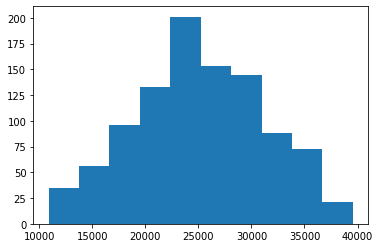

In [32]:
plt.hist(data_frame['z'])

### 2. Muestra los datos estadísticos de cada variable (media, desviación típica, máx, mín, etc.)


In [4]:
data_frame.describe()

,x,y,z
count,1000.000000,1000.000000,1000.000000
mean,34.926347,99.818799,25139.741925
std,6.150012,20.497557,6049.261231
min,20.169684,52.723326,10886.932642
25%,30.698559,85.430365,20871.962246
50%,34.707518,100.437271,24975.889476
75%,39.354616,114.434725,29496.073438
max,49.889901,147.768262,39564.914089


### 3. Usando la distribución normal calcula las siguientes probabilidades
- calcula (usando la distribución normal) la probabilidad que el valor **"y"** esté entre 55 y 70
- calcula (usando la distribución normal) la probabilidad que el valor **"z"** esté entre 20000 y 30000

In [5]:
def is_column_name(data_frame, column_name):
  if column_name is None:
    return data_frame
  else:
    return data_frame[column_name]

def normalization(mu, sigma, value):
  return (value - mu) / sigma

def calculate_probability(data_frame, point_a, point_b, column_name = None):
  
  data = is_column_name(data_frame, column_name)

  # Media
  mu = data.mean()
  # Desviación tipica
  sigma = data.std()

  a = normalization(mu, sigma, point_a)
  b = normalization(mu, sigma, point_b)

  return st.norm.cdf(b) - st.norm.cdf(a)

In [6]:
calculate_probability(data_frame, 55, 70, 'y')

0.05848145470576917

In [7]:
calculate_probability(data_frame, 20000, 30000, 'z')

0.591381216717474

### 4. Realiza dos funciones que reciban un dataframe y un nombre de columna y devuelva una tupla con los valores (XL, XN) correspondiente al intervalo al cual si no pertenece un valor puede ser considerado como outlier.
- Realiza el método 1 (el que se basa en la distribución normal).
  - Esta función además deberá recibir el porcentaje para que un elemento se quede en la banda.
- Realiza la función usando el método basado en cuantilies.
  - Esta función además deberá recibir otro parámetro (k) que indica si queremos detectar outliers débiles(1.5) o no (k=3).


In [8]:
def outlier_normal_dist(data_frame, column_name = None, p_g = 0.95):
  
  data = is_column_name(data_frame, column_name)

  alfa_g = (1 - p_g) / 2
  alfa = 1 - ((1 - alfa_g) ** (1 / len(data) ) )
  k = st.norm.ppf(1 - alfa / 2)

  std = np.std(data)
  mean = np.mean(data)

  xL = round(mean - k * std, 4)
  xU = round(mean + k * std, 4)
  return (xL, xU)

def outlier_quantiles(data_frame, column_name = None, weak = True):
  
  data = is_column_name(data_frame, column_name)
  
  if weak:
    k = 1.5
  else:
    k = 3

  Q1 = np.quantile(data, 0.25)
  Q3 = np.quantile(data, 0.75)
  IQR = Q3 - Q1

  xL = Q1 - k * IQR
  xU = Q3 + k * IQR
  return (xL, xU)

In [9]:
outlier_x_n = outlier_normal_dist(data_frame, 'x')
outlier_y_n = outlier_normal_dist(data_frame, 'y')
outlier_z_n = outlier_normal_dist(data_frame, 'z')
print(outlier_x_n, outlier_y_n, outlier_z_n)

(9.0358, 60.8169) (13.5273, 186.1103) (-326.705, 50606.1889)


In [10]:
outlier_x_q = outlier_quantiles(data_frame, 'x')
outlier_y_q = outlier_quantiles(data_frame, 'y')
outlier_z_q = outlier_quantiles(data_frame, 'z')
print(outlier_x_q, outlier_y_q, outlier_z_q)

(17.714473219072516, 52.33870195555059) (41.92382537750162, 157.94126447652903) (7935.795456346059, 42432.24022773577)


### 5. Introduce deliberadamente dos valores fuera de los rangos en alguno de los atributos (x, y, z) y, usando el método jackknife detecte las observaciones influyentes para la media. Haz lo mismo para la mediana. Comenta los resultados obtenidos

In [11]:
def print_mean_median(data_frame, column_name = None):
  
  data = is_column_name(data_frame, column_name)

  print(f'Media: {np.mean(data)}, Mediana: {np.median(data)}')

def means_array(data_frame, column_name = None):
  
  data = is_column_name(data_frame, column_name)

  means = np.zeros(len(data))

  for i in range(len(data)):
    data_not_i = np.delete(np.asarray(data), i)
    means[i] = np.mean(data_not_i)
  
  return means

def medians_array(data_frame, column_name = None):
  
  data = is_column_name(data_frame, column_name)

  medians = np.zeros(len(data))
  
  for i in range(len(data)):
    data_not_i = np.delete(np.asarray(data), i)
    medians[i] = np.median(data_not_i)
  
  return medians

In [12]:
data_frame['y'][50] = -25
data_frame['y'][70] = 500

print_mean_median(data_frame, 'y')


Media: 99.50425822622975, Mediana: 99.44175205573879


In [ ]:
means = means_array(data_frame, 'y')
means

In [14]:
outliers_means = outlier_quantiles(means)
outliers_means

(99.44632629992178, 99.56349289890714)

In [15]:
for i in range(len(data_frame['y'])):
  if means[i] < outliers_means[0] or means[i] > outliers_means[1]:
    print(f"La media[{i}] = {means[i]} es influyente")

La media[50] = 99.6288871133431 es influyente
La media[70] = 99.10336158781757 es influyente


In [ ]:
medians = medians_array(data_frame, 'y')
medians

In [17]:
outliers_medians = outlier_quantiles(medians)
outliers_medians

(99.22547893370594, 99.65802517777163)

In [18]:
for i in range(len(data_frame['y'])):
  if medians[i] < outliers_medians[0] or medians[i] > outliers_medians[1]:
    print(f"La mediana[{i}] = {medians[i]} es influyente")

### 6. Utiliza MinMaxScaler para realizar un escalado del dataframe creado en el ejercicio 1. Muestra los resultados y comenta que ha sucedido.

In [12]:
scaler = MinMaxScaler()

La funcion fit calcula el maximo y el minimo que se utilizara para despues escalar los datos entre 0 y 1

In [13]:
scaler.fit(data_frame)

MinMaxScaler()

Te muestra los datos mas grandes del data frame.

In [14]:
scaler.data_max_

array([   49.88990102,   147.76826197, 39564.91408904])

Te muestra los datos mas pequeños del data frame.

In [15]:
scaler.data_min_

array([   20.16968433,    52.72332647, 10886.93264192])

Scala los datos deacuerdo al rango que se haya calculado en este caso entre 0 y 1

In [19]:
data_transform = scaler.transform(data_frame)
data_transform

array([[0.38020187, 0.74762203, 0.2678677 ],
       [0.44038792, 0.68443743, 0.54104891],
       [0.45293982, 0.47786571, 0.12350555],
       ...,
       [0.53656442, 0.59323343, 0.77445119],
       [0.08145929, 0.77169668, 0.81486421],
       [0.69090083, 0.69382588, 0.01123079]])

In [28]:
data_transform.max()

1.0

In [29]:
data_transform.min()

0.0

###7. (ampliación) Busca un dataframe de las siguientes urls que contengan al menos dos atributos numéricos reales en distintas escalas.
- https://archive.ics.uci.edu/ml/datasets.php
-  https://www.kaggle.com/datasets
## Una vez encontrado, realiza las siguientes cuestiones.
- Importa el dataset como un dataframe de pandas
- Selecciona los dos atributos numéricos
- Calcula la media y la varianza de esos dos datos numéricos
- Realiza un estudio para determinar si contiene outliers o no (en el caso que no encuentres outliers, introduce uno deliberadamente)
- Usa el método jackknife para detectar si hay observaciones influyentes para la media en alguno de los atributos.
- Escala los atributos usando MinMaxScaler

#### Importa el dataset como dataframe de pandas.

https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [33]:
diabetes = pd.read_csv('diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Selecciona los dos atributos numéricos

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

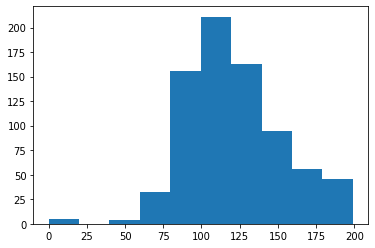

In [34]:
plt.hist(diabetes['Glucose'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <a list of 10 Patch objects>)

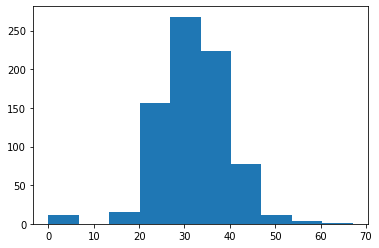

In [35]:
plt.hist(diabetes['BMI'])

#### Calcula la media y la varianza de esos dos datos numéricos

In [37]:
print(np.mean(diabetes['Glucose']))
print(np.var(diabetes['Glucose']))
print(np.mean(diabetes['BMI']))
print(np.var(diabetes['BMI']))

120.89453125
1020.9172617594401
31.992578124999998
62.079046478271486


#### Realiza un estudio para determinar si contiene outliers o no (en el caso que no encuentres outliers, introduce uno deliberadamente)


In [41]:
# Outliers de los datos Glucose
# Metodo construccion de bandas
outliers_glucose_n = outlier_normal_dist(diabetes, 'Glucose')
# Metodo quartiles
outliers_glucose_q = outlier_quantiles(diabetes, 'Glucose')

print(outliers_glucose_n, outliers_glucose_q)

(-11.7677, 253.5568) (37.125, 202.125)


In [42]:
# Outliers de los datos BMI
# Metodo construccion de bandas
outliers_bmi_n = outlier_normal_dist(diabetes, 'BMI')
# Metodo quartiles
outliers_bmi_q = outlier_quantiles(diabetes, 'BMI')

print(outliers_bmi_n, outliers_bmi_q)

(-0.7207, 64.7059) (13.35, 50.550000000000004)


In [45]:
# Metodo de contruccion de bandas con el dato Glucose
for i in range(len(diabetes['Glucose'])):
  if diabetes['Glucose'][i] < outliers_glucose_n[0] or diabetes['Glucose'][i] > outliers_glucose_n[1]:
    print(f"El dato[{i}] = {diabetes['Glucose'][i]} es un outlier")

In [46]:
# Metodo de los Quartiles con el dato Glucose
for i in range(len(diabetes['Glucose'])):
  if diabetes['Glucose'][i] < outliers_glucose_q[0] or diabetes['Glucose'][i] > outliers_glucose_q[1]:
    print(f"El dato[{i}] = {diabetes['Glucose'][i]} es un outlier")

El dato[75] = 0 es un outlier
El dato[182] = 0 es un outlier
El dato[342] = 0 es un outlier
El dato[349] = 0 es un outlier
El dato[502] = 0 es un outlier


In [47]:
# Metodo de contruccion de bandas con el dato BMI
for i in range(len(diabetes['BMI'])):
  if diabetes['Glucose'][i] < outliers_bmi_n[0] or diabetes['Glucose'][i] > outliers_bmi_n[1]:
    print(f"El dato[{i}] = {diabetes['BMI'][i]} es un outlier")

El dato[0] = 33.6 es un outlier
El dato[1] = 26.6 es un outlier
El dato[2] = 23.3 es un outlier
El dato[3] = 28.1 es un outlier
El dato[4] = 43.1 es un outlier
El dato[5] = 25.6 es un outlier
El dato[6] = 31.0 es un outlier
El dato[7] = 35.3 es un outlier
El dato[8] = 30.5 es un outlier
El dato[9] = 0.0 es un outlier
El dato[10] = 37.6 es un outlier
El dato[11] = 38.0 es un outlier
El dato[12] = 27.1 es un outlier
El dato[13] = 30.1 es un outlier
El dato[14] = 25.8 es un outlier
El dato[15] = 30.0 es un outlier
El dato[16] = 45.8 es un outlier
El dato[17] = 29.6 es un outlier
El dato[18] = 43.3 es un outlier
El dato[19] = 34.6 es un outlier
El dato[20] = 39.3 es un outlier
El dato[21] = 35.4 es un outlier
El dato[22] = 39.8 es un outlier
El dato[23] = 29.0 es un outlier
El dato[24] = 36.6 es un outlier
El dato[25] = 31.1 es un outlier
El dato[26] = 39.4 es un outlier
El dato[27] = 23.2 es un outlier
El dato[28] = 22.2 es un outlier
El dato[29] = 34.1 es un outlier
El dato[30] = 36.0 es

In [48]:
# Metodo de los Quartiles con el dato BMI
for i in range(len(diabetes['BMI'])):
  if diabetes['BMI'][i] < outliers_bmi_q[0] or diabetes['BMI'][i] > outliers_bmi_q[1]:
    print(f"El dato[{i}] = {diabetes['BMI'][i]} es un outlier")

El dato[9] = 0.0 es un outlier
El dato[49] = 0.0 es un outlier
El dato[60] = 0.0 es un outlier
El dato[81] = 0.0 es un outlier
El dato[120] = 53.2 es un outlier
El dato[125] = 55.0 es un outlier
El dato[145] = 0.0 es un outlier
El dato[177] = 67.1 es un outlier
El dato[193] = 52.3 es un outlier
El dato[247] = 52.3 es un outlier
El dato[303] = 52.9 es un outlier
El dato[371] = 0.0 es un outlier
El dato[426] = 0.0 es un outlier
El dato[445] = 59.4 es un outlier
El dato[494] = 0.0 es un outlier
El dato[522] = 0.0 es un outlier
El dato[673] = 57.3 es un outlier
El dato[684] = 0.0 es un outlier
El dato[706] = 0.0 es un outlier


#### Usa el método jackknife para detectar si hay observaciones influyentes para la media en alguno de los atributos.


In [ ]:
glucose_means = means_array(diabetes, 'Glucose')
glucose_means

In [58]:
outliers_glucose_means = outlier_quantiles(glucose_means)
outliers_glucose_means

(120.78862451108215, 121.00374837027378)

In [59]:
for i in range(len(diabetes['Glucose'])):
  if glucose_means[i] < outliers_glucose_means[0] or glucose_means[i] > outliers_glucose_means[1]:
    print(f"La mediana[{i}] = {glucose_means[i]} es influyente")

La mediana[75] = 121.05215123859192 es influyente
La mediana[182] = 121.05215123859192 es influyente
La mediana[342] = 121.05215123859192 es influyente
La mediana[349] = 121.05215123859192 es influyente
La mediana[502] = 121.05215123859192 es influyente


In [ ]:
bmi_means = means_array(diabetes, 'BMI')
bmi_means

In [63]:
outliers_bmi_means = outlier_quantiles(bmi_means)
outliers_bmi_means

(31.968383311603645, 32.01688396349414)

In [64]:
for i in range(len(diabetes['BMI'])):
  if bmi_means[i] < outliers_bmi_means[0] or bmi_means[i] > outliers_bmi_means[1]:
    print(f"La mediana[{i}] = {bmi_means[i]} es influyente")

La mediana[9] = 32.034289439374184 es influyente
La mediana[49] = 32.034289439374184 es influyente
La mediana[60] = 32.034289439374184 es influyente
La mediana[81] = 32.034289439374184 es influyente
La mediana[120] = 31.964928292046935 es influyente
La mediana[125] = 31.9625814863103 es influyente
La mediana[145] = 32.034289439374184 es influyente
La mediana[177] = 31.946805736636243 es influyente
La mediana[193] = 31.966101694915253 es influyente
La mediana[247] = 31.966101694915253 es influyente
La mediana[303] = 31.96531942633637 es influyente
La mediana[371] = 32.034289439374184 es influyente
La mediana[426] = 32.03428943937418 es influyente
La mediana[445] = 31.956844850065185 es influyente
La mediana[494] = 32.034289439374184 es influyente
La mediana[522] = 32.034289439374184 es influyente
La mediana[673] = 31.959582790091265 es influyente
La mediana[684] = 32.034289439374184 es influyente
La mediana[706] = 32.034289439374184 es influyente


#### Escala los atributos usando MinMaxScaler

In [72]:
scaler.fit(diabetes)

MinMaxScaler()

In [70]:
scaler.data_max_

array([ 17.  , 199.  , 122.  ,  99.  , 846.  ,  67.1 ,   2.42,  81.  ,
         1.  ])

In [68]:
scaler.data_min_

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.078, 21.   ,
        0.   ])

In [75]:
diabetes_transform = scaler.transform(diabetes)
diabetes_transform

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.23441503, 0.48333333,
        1.        ],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.11656704, 0.16666667,
        0.        ],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.25362938, 0.18333333,
        1.        ],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.07130658, 0.15      ,
        0.        ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.11571307, 0.43333333,
        1.        ],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.10119556, 0.03333333,
        0.        ]])